In [2]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [3]:
# Direktori gambar
train_dir = "images/training/"
test_dir = "images/test/"

In [4]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list
    

In [5]:
# Load training data
train_img = load_dataset(train_dir)

# Load test data
test_img = load_dataset(test_dir)

In [6]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

In [7]:
train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)

In [8]:
def brightness_histogram(image, bins=256, range=(0, 256)):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Extract the V channel (brightness)
    brightness = img_hsv[:, :, 2]
    
    # Calculate histogram for the V channel
    hist = cv2.calcHist([brightness], [0], None, [bins], range)
    
    # Normalize the histogram
    hist = hist / hist.sum()
    
    return hist


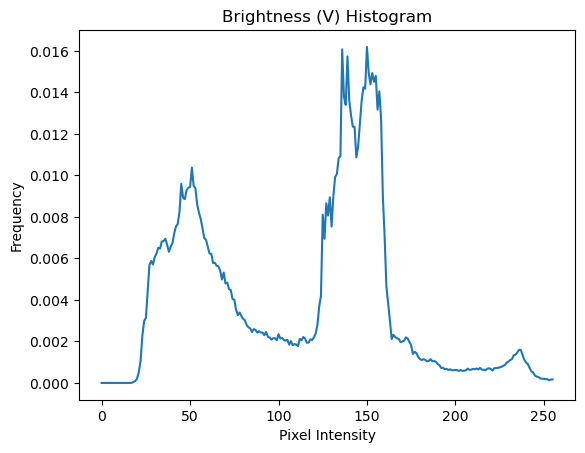

In [33]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

brightness_histogram_img = brightness_histogram(feature_img)

plt.plot(brightness_histogram_img)
plt.title("Brightness (V) Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_brightness_histogram_feature(img_list):
    hist_list = []
    labels = []

    for img in img_list:
        img_hist = brightness_histogram(img[0])  # Get the brightness histogram from image
        img_label = img[1]  # Get the image label

        hist_list.append(img_hist.flatten())  # Flatten the histogram array to 1D
        labels.append(img_label)
    
    # Stack data in columnar way
    hist_array = np.array(hist_list)  # Convert list of histograms to array
    data = np.column_stack((hist_array, labels))  # Stack histograms and labels

    # Create a Pandas dataframe
    column_names = [f'Bin_{i}' for i in range(hist_array.shape[1])] + ['LABELS']  # Naming histogram bins
    df = pd.DataFrame(data, columns=column_names)

    return df

In [11]:
# Extract feature on train data
train_hist_img = extract_brightness_histogram_feature(train_std_img_list)
print(f'Shape: {train_hist_img.shape}')
train_hist_img.head()

Shape: (240, 257)


,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_247,Bin_248,Bin_249,Bin_250,Bin_251,Bin_252,Bin_253,Bin_254,Bin_255,LABELS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000048,0.000044,0.000042,0.000032,0.000030,0.000035,0.000033,0.000039,0.000029,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000259,0.000315,0.000420,0.000309,0.000267,0.000202,0.000161,0.000197,0.000147,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001067,0.001253,0.001400,0.001629,0.001968,0.002191,0.002700,0.003608,0.007095,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000179,0.000185,0.000150,0.000120,0.000150,0.000147,0.000115,0.000106,0.000080,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000048,0.000030,0.000042,0.000014,0.000021,0.000011,0.000012,0.000011,0.000002,1.0


In [12]:
# Extract feature on test data
test_hist_img = extract_brightness_histogram_feature(test_std_img_list)
print(f'Shape: {test_hist_img.shape}')
test_hist_img.head()

Shape: (160, 257)


,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_247,Bin_248,Bin_249,Bin_250,Bin_251,Bin_252,Bin_253,Bin_254,Bin_255,LABELS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000105,0.000061,0.000071,0.000095,0.000083,0.000088,0.000076,0.000061,0.000068,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003171,0.003474,0.003770,0.004370,0.005552,0.008476,0.009736,0.013476,0.021748,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000195,0.000142,0.000153,0.000174,0.000205,0.000209,0.000227,0.000194,0.000173,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000273,0.000230,0.000174,0.000177,0.000120,0.000139,0.000139,0.000106,0.000056,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000252,0.000239,0.000217,0.000174,0.000194,0.000180,0.000148,0.000126,0.000088,1.0


In [13]:
from sklearn.svm import SVC

# Mengambil semua kolom kecuali kolom terakhir untuk fitur
X_train = train_hist_img.iloc[:, :-1].values  # Semua kolom kecuali LABELS
y_train = train_hist_img['LABELS'].values  # Kolom LABELS
X_test = test_hist_img.iloc[:, :-1].values # Semua kolom kecuali LABELS
y_test = test_hist_img['LABELS'].values # Kolom LABELS


# Buat dan latih model SVC
model = SVC(kernel='poly') 
model.fit(X_train, y_train)   # Melatih model

SVC(kernel='poly')

In [14]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.9958333333333333
Accuracy on test: 0.98125


### Melakukan prediksi pada gambar acak

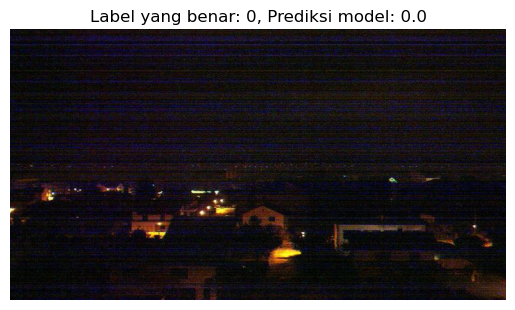

In [15]:
# Pilih gambar acak dari dataset
random_index = random.randint(0, len(test_std_img_list) - 1)
random_image = test_std_img_list[random_index][0]  # Ambil gambar test
true_label = test_std_img_list[random_index][1]    # Ambil label yang benar

# Ekstrak fitur histogram kecerahan
random_image_hist = brightness_histogram(random_image)

random_image_hist = random_image_hist.reshape(1, -1)  # Mengubah menjadi 2D array

# Lakukan prediksi
predicted_label = model.predict(random_image_hist)

# Tampilkan gambar dan hasil prediksi
plt.imshow(random_image)
plt.axis('off')  # Menyembunyikan sumbu
plt.title(f'Label yang benar: {true_label}, Prediksi model: {predicted_label[0]}')
plt.show()

### Mencari prediksi yang salah

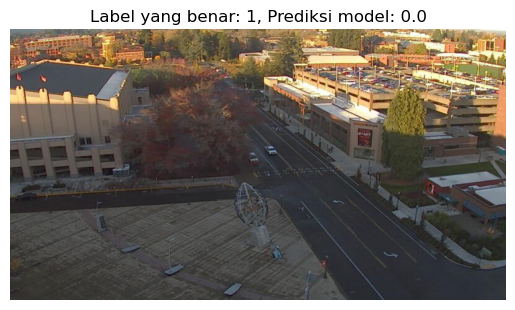

In [16]:
# Inisialisasi untuk menemukan gambar yang salah prediksi
found_mismatch = False

while not found_mismatch:
    # Pilih gambar acak dari dataset
    random_index = random.randint(0, len(test_std_img_list) - 1)
    random_image = test_std_img_list[random_index][0]  # Ambil gambar test
    true_label = test_std_img_list[random_index][1]    # Ambil label yang benar

    # Ekstrak fitur histogram kecerahan
    random_image_hist = brightness_histogram(random_image)
    random_image_hist = random_image_hist.reshape(1, -1)  # Mengubah menjadi 2D array

    # Lakukan prediksi
    predicted_label = model.predict(random_image_hist)

    # Cek apakah prediksi berbeda dari label yang benar
    if predicted_label[0] != true_label:
        found_mismatch = True  # Temukan ketidakcocokan

# Tampilkan gambar dan hasil prediksi
plt.imshow(random_image)
plt.axis('off')  # Menyembunyikan sumbu
plt.title(f'Label yang benar: {true_label}, Prediksi model: {predicted_label[0]}')
plt.show()